[YYYYMMDD]

# 1. Exploration

EDA of the features and target

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Basic Summary
        [ ] Data Preparations / Feature Engineering
            [ ] Missing Value
            [ ] Outliers Handling
            [ ] Categorical Handling 
        [ ] Features Summary
        [ ] Features Connection to Target

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import joblib

sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 
from ramal import jampi

In [47]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_1'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [4]:
df_sales = pd.read_csv(PATH_INTERIM+'data_focus_iter1.csv')

In [7]:
df_sales.shape

(1144, 4)

In [8]:
df_sales

,ids,Date,wsales,IsHoliday
0,10:72,2010-02-05,232558.51,False
1,10:72,2010-02-12,202622.42,True
2,10:72,2010-02-19,184982.01,False
3,10:72,2010-02-26,186002.43,False
4,10:72,2010-03-05,191989.54,False
...,...,...,...,...
1139,3:38,2012-09-28,77952.53,False
1140,3:38,2012-10-05,99091.97,False
1141,3:38,2012-10-12,95333.35,False
1142,3:38,2012-10-19,91827.97,False


In [9]:
product_s = df_sales.ids.unique()

## Data Prep

In [31]:
df_temp = df_sales[df_sales['ids'] == product_s[3]]
ts = jampi(data = df_temp, time_col = 'Date', data_col = 'wsales', split = 0.2)

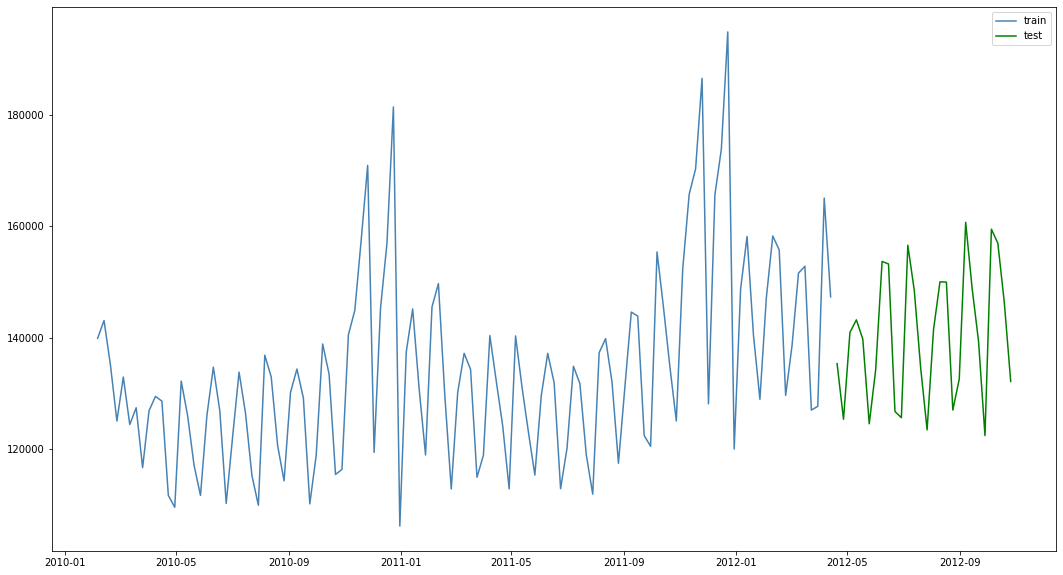

In [32]:
# ts.plot()
ts.plot(test = True)

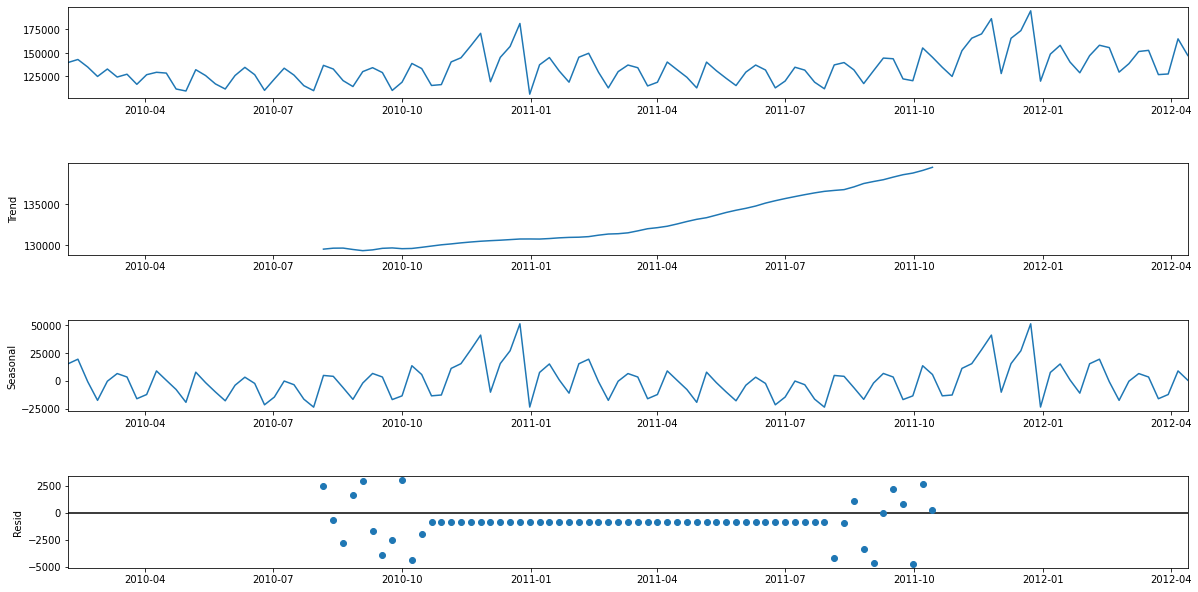

In [33]:
## decompose
ts.decompose()
fig = ts.decomp.plot()
fig.set_size_inches((20, 9))

In [34]:
ts.adf_test()

ADF Statistic: -1.5635413479087368
p-value: 0.501877411502769
Not Stationary


/usr/local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


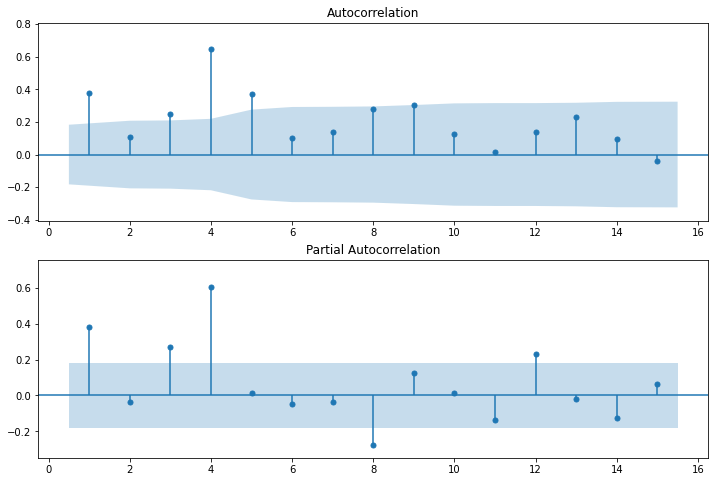

In [36]:
ts.acf_pacf(logs = 15)

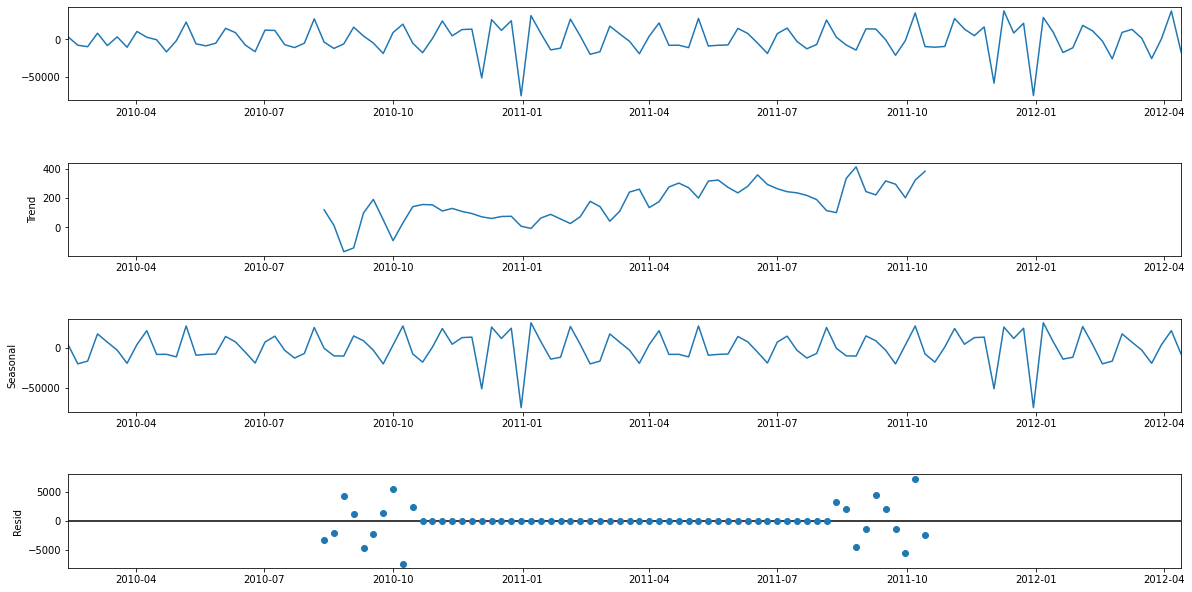

In [40]:
## decompose2
ts.decompose(differencing = 1)
fig = ts.decomp.plot()
fig.set_size_inches((20, 9))

/usr/local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


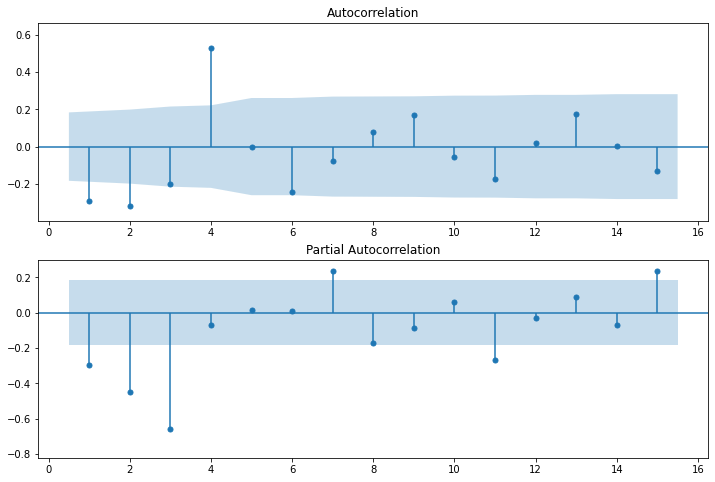

In [41]:
ts.acf_pacf(logs = 15, differencing = 1)

/usr/local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


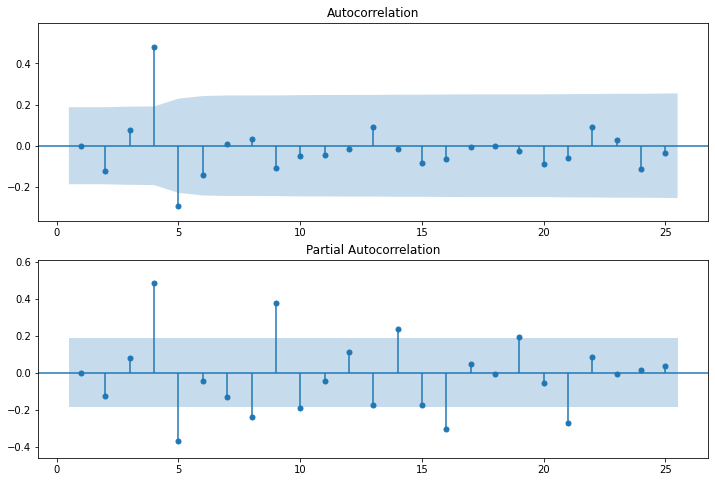

In [52]:

## seasonal
ts.acf_pacf(logs = 25, differencing = 5)

In [43]:
ts.auto_arma_param(differencing = 1)

MA(2)
AR(3)
with  1 differencing


In [44]:
product_s[3]

'1:92'

In [48]:
joblib.dump(ts,PATH_MODEL+'ramal_1:92.pkl')

['../../artifacts/iteration_1/ramal_1:92.pkl']